In [2]:
pip install xgboost

**The XGBoost library is an open-source machine learning library designed for gradient boosting. It is widely used for various machine learning tasks, including classification and regression, and is known for its performance and effectiveness in many competitions and real-world applications.**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from collections import  Counter
import nltk
import pickle
import string


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

  * This imports the Pandas library, which is used for data manipulation and analysis. It provides data structures like DataFrames for handling structured data.

 * This imports the NumPy library, which is used for numerical operations and provides support for arrays and matrices. 

*  This imports the Matplotlib library, which is a popular data visualization library in Python. It allows you to create various types of plots and charts.

*  This imports the Seaborn library, which is built on top of Matplotlib and provides an interface for creating more aesthetically pleasing and informative statistical graphics.
* This imports the LabelEncoder class from scikit-learn (sklearn). LabelEncoder is used for encoding categorical labels into numeric values.
*This imports the NLTK (Natural Language Toolkit) library's stopwords corpus, which contains a list of common words (e.g., "the," "and," "in") that are often removed from text data during preprocessing.

* This imports the PorterStemmer class from NLTK, which is used for stemming text data. Stemming reduces words to their root form (e.g., "running" becomes "run").

* These import different variants of the Naive Bayes classifier from scikit-learn. Naive Bayes is a popular classification algorithm for text data.


* This imports the LogisticRegression class from scikit-learn, which is used for logistic regression, a common classification algorithm.


* This imports the SVC (Support Vector Classification) class from scikit-learn, which is used for support vector machine (SVM) classification.


* This imports the DecisionTreeClassifier class from scikit-learn, which is used for decision tree-based classification.



* This imports the KNeighborsClassifier class from scikit-learn, which is used for k-nearest neighbors classification.


* These import various ensemble classifiers from scikit-learn. Ensemble methods combine multiple base classifiers to improve predictive performance.


* These import the XGBoost classifier and XGBoost random forest classifier from the XGBoost library. XGBoost is a powerful gradient boosting library commonly used for machine learning tasks.


* These import evaluation metrics from scikit-learn, including accuracy, confusion matrix, and precision score, which are commonly used to assess classifier performance.


* This imports the TfidfVectorizer class from scikit-learn, which is used to convert text data into numerical features using the TF-IDF (Term Frequency-Inverse Document Frequency) technique.

* This imports the train_test_split function from scikit-learn, which is used to split a dataset into training and testing subsets for machine learning.

 * this imports the WordCloud class from the Wordcloud library, which is used to create word clouds for text visualization.
 
* This imports the Counter class from Python's collections module, which is used for counting occurrences of elements in a sequence.

* This imports the NLTK library, a powerful library for natural language processing tasks.


* This imports Python's built-in pickle module, which is used for serializing and deserializing Python objects.

* This imports Python's string module, which provides a collection of string constants and functions for string manipulation.
 
 
**Finally, the %matplotlib inline magic command is used in Jupyter Notebooks to display Matplotlib plots directly in the notebook.**

**The nltk.download('punkt') and nltk.download('stopwords') commands are used to download NLTK resources (the Punkt tokenizer and stopwords corpus) if they haven't been downloaded previously. These resources are required for certain NLTK text processing tasks.**


In [4]:
df = pd.read_csv("spam.csv", encoding="latin-1")

**encoding="latin-1": This specifies the character encoding used in the CSV file. "latin-1" is a common choice for handling text data with extended characters.**

In [5]:
df.sample(1)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2329,ham,Am surfing online store. For offers do you wan...,NaN,NaN,NaN


In [6]:
df = pd.read_csv("spam.csv", encoding="latin-1", usecols=["v1","v2"])

In [7]:
df.sample(5)

,v1,v2
3115,ham,Uncle Abbey! Happy New Year. Abiola
499,ham,Dear i have reache room
5115,spam,"Get 3 Lions England tone, reply lionm 4 mono o..."
2261,ham,Did you show him and wot did he say or could u...
4955,ham,Ahhhh...just woken up!had a bad dream about u ...


In [8]:
df.rename(columns={"v1": "output","v2": "input"}, inplace = True)

In [10]:
df.sample(1)

,output,input
5168,ham,"IÛ÷ve got some salt, you can rub it in my ope..."


**.sample(1): This is a pandas DataFrame method that randomly samples one row from the DataFrame. The 1 inside the parentheses specifies the number of rows to sample.**

# Label Encoder

In [12]:
# Encoding Target Feature 
le = LabelEncoder()
df["output"] = le.fit_transform(df["output"])

**le = LabelEncoder(): This line creates an instance of the LabelEncoder class and assigns it to the variable le. The LabelEncoder is used to encode categorical labels (in this case, likely text labels) into numerical values, which is often necessary for machine learning algorithms.**


**le.fit_transform(df["output"]): Here, you're applying the fit_transform method of the LabelEncoder to the selected "output" column. This method both fits the encoder to the unique values in the column and transforms those values into numerical labels. The numerical labels will replace the original categorical values in the "output" column of your DataFrame.**

In [13]:
df.sample(1)

,output,input
4709,0,Ya i knw u vl giv..its ok thanks kano..anyway ...


In [14]:
# Shape of the Dataset
df.shape

(5572, 2)

**(number_of_rows, number_of_columns)**

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   output  5572 non-null   int64 
 1   input   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


1. The total number of rows (entries) in the DataFrame.
2. The total number of columns in the DataFrame.
3. For each column:
   - The column name or label.
   - The data type of the values in the column (e.g., int64, float64, object).
   - The number of non-null (non-missing) values in the column.
   - Memory usage, which indicates how much memory is used by the column's data.

In [16]:
# Check Null Values
df.isnull().sum()

output    0
input     0
dtype: int64

In [17]:
# Check Duplicate Values
df.duplicated().sum()

403

In [18]:
# Drop Duplicates
df = df.drop_duplicates(keep="first")

In [19]:
df.shape

(5169, 2)

In [20]:
df.head()

,output,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**The df.head() code is used to display the first few rows of a pandas DataFrame df. By default, it displays the first 5 rows, but you can specify a different number of rows inside the parentheses if needed.**

In [21]:
# Ham & Spam Counts
df["output"].value_counts()

0    4516
1     653
Name: output, dtype: int64

**df["output"]: This selects the "output" column from the DataFrame df.**

**value_counts(): This is a pandas Series method that returns a Series containing the counts of unique values in the selected column, in descending order. The resulting Series will have the unique values as the index and their respective counts as the values.**

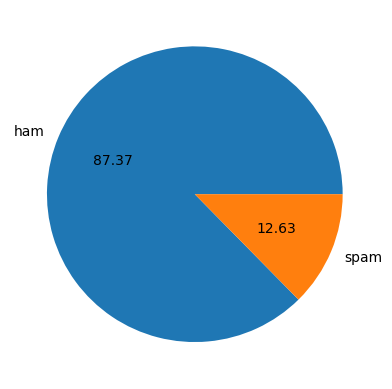

In [22]:
plt.pie(df["output"].value_counts(),autopct = "%.2f", labels=['ham','spam'])
plt.show()

**df["output"].value_counts(): This retrieves the counts of unique values in the "output" column of your DataFrame.**
**autopct="%.2f": This parameter specifies that the percentages should be displayed with two decimal places in the pie chart.**
**labels=['ham', 'spam']: These are the labels assigned to each slice of the pie chart.**
**plt.show(): This line displays the pie chart.**

# Feature Engineering

## ➕ Feature Construction: New Features ➕

In [23]:
import nltk

In [27]:
# Total No. of Characters in Data
df["characters"] = df["input"].apply(len)

In [28]:
# Total No. of Words in Data
df["word"] = df["input"].apply(lambda x:len( nltk.word_tokenize(x)))

In [29]:
# Total No. of Sentence
df["sentence"] = df["input"].apply(lambda x:len(nltk.sent_tokenize(x)))

**df["input"]: This selects the "input" column from your DataFrame df, which presumably contains text data.**

**.apply(...): This applies a function to each element in the selected "input" column.**

**lambda x: len(nltk.word_tokenize(x)): This is a lambda function that tokenizes the input text x into words using NLTK's word_tokenize function and then calculates the length of the resulting list of words.**

**df["word"] = ...: This assigns the calculated word counts to a new column called "word" in your DataFrame.**

In [30]:
df.head(1)

,output,input,characters,word,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2


In [31]:
# Statistical Analysis of new features
df[["characters","word", "sentence"]].describe()

,characters,word,sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


**df[["characters", "word", "sentence"]]: This part of the code selects the specified columns ("characters," "word," and "sentence") from your DataFrame. You're essentially creating a subset of your DataFrame that contains only these three columns.**

**.describe(): This is a pandas DataFrame method that computes various summary statistics for each of the selected numeric columns. The summary statistics typically include:**
   - Count: The number of non-null values in each column.
   - Mean: The average value of each column.
   - Std (Standard Deviation): A measure of the spread or dispersion of values in each column.
   - Min: The minimum value in each column.
   - 25%: The first quartile or 25th percentile value.
   - 50%: The median or 50th percentile value.
   - 75%: The third quartile or 75th percentile value.
   - Max: The maximum value in each column.

In [32]:
# Statistical Analysis for HAM Data
df[df["output"]==0][["characters","word", "sentence"]].describe()

,characters,word,sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
# Statistical Analysis for SPAM Data
df[df["output"] ==1][["characters","word", "sentence"]].describe()

,characters,word,sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


# Histogram Plot

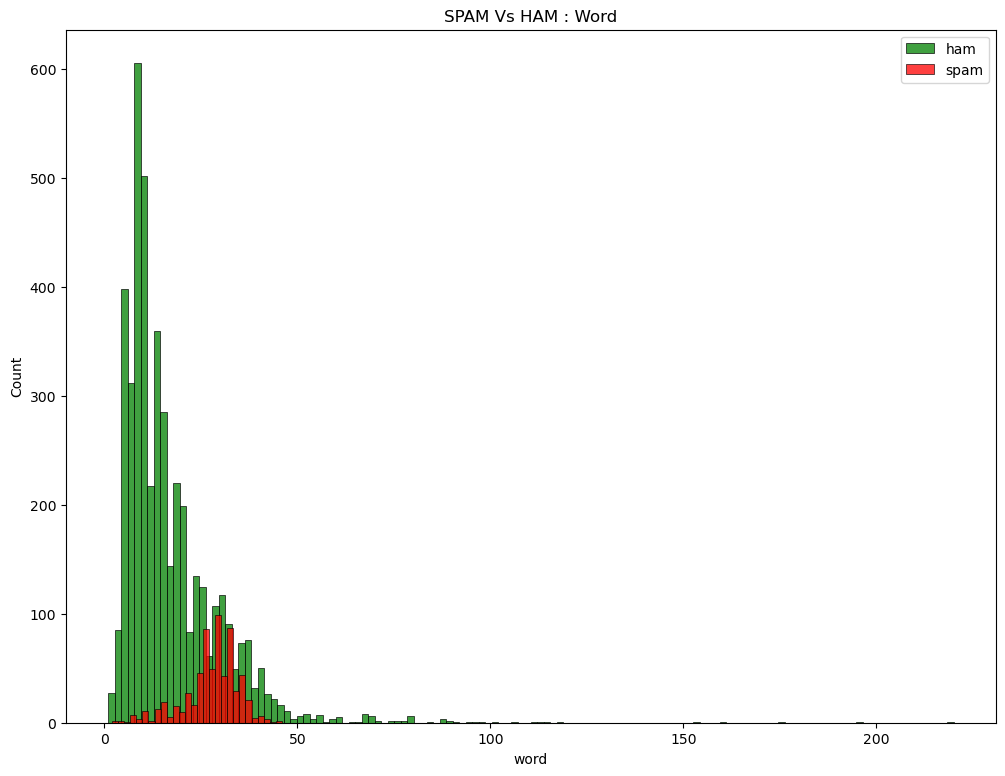

In [41]:
plt.figure(figsize=(12,9))
sns.histplot(df[df["output"]==0]["word"],label= "ham",color="green")
sns.histplot(df[df["output"]==1]["word"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Word")
plt.legend()
plt.show()


**The code you provided uses the seaborn library to create a histogram plot comparing the distribution of the "word" feature for "ham" and "spam" samples in your DataFrame df.**

1. plt.figure(figsize=(10, 7)): This line sets the figure size for your plot, making it 10 units wide and 7 units tall.

2. sns.histplot(df[df["output"]==0]["word"], label="ham", color="green"): This line creates a histogram plot for the "word" feature where the "output" is equal to 0 (representing "ham" samples). It uses the color green and labels it as "ham."

3. sns.histplot(df[df["output"]==1]["word"], label="spam", color="red"): This line creates a histogram plot for the "word" feature where the "output" is equal to 1 (representing "spam" samples). It uses the color red and labels it as "spam."

4. plt.title("SPAM Vs HAM : Word"): This line sets the title of the plot.

5. plt.legend(): This line adds a legend to the plot to differentiate between the "ham" and "spam" distributions.

6. plt.show(): This line displays the plot.

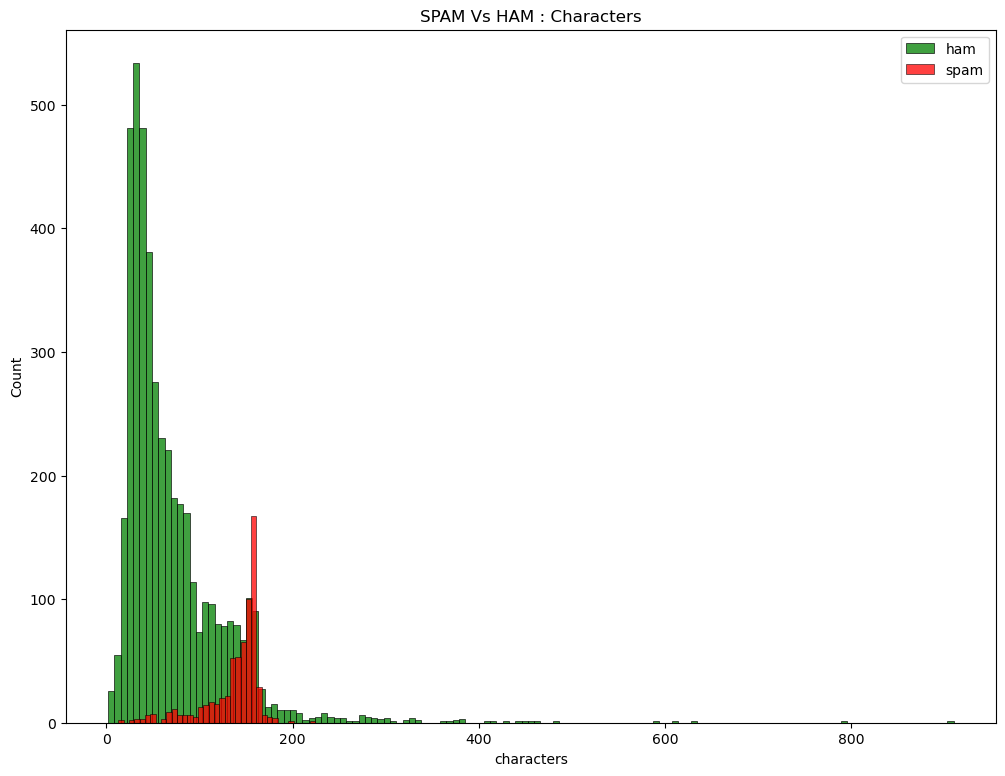

In [44]:
plt.figure(figsize=(12,9))
sns.histplot(df[df["output"]==0]["characters"],label= "ham",color="green")
sns.histplot(df[df["output"]==1]["characters"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Characters")
plt.legend()
plt.show()

# Pair Plot

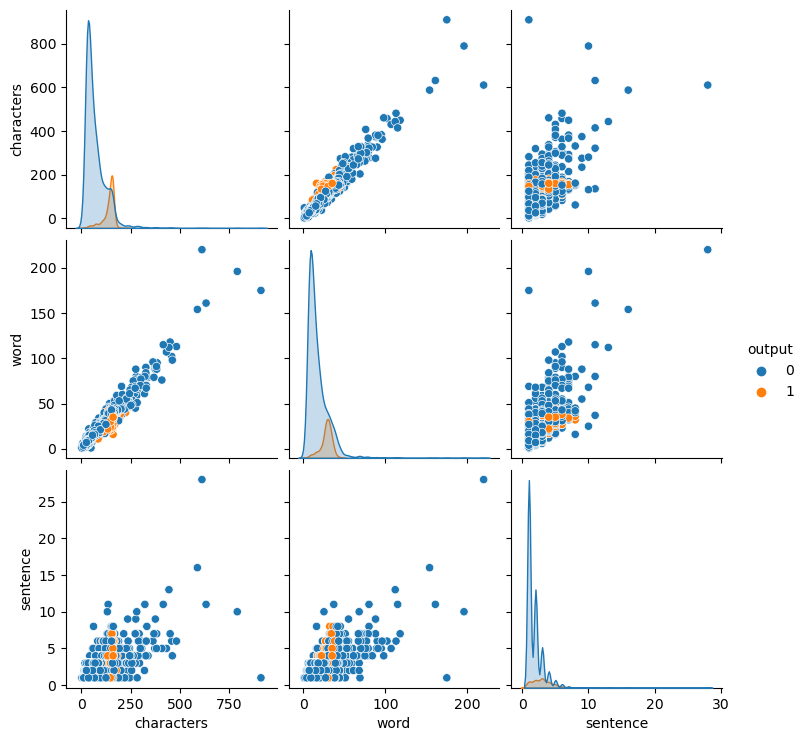

In [45]:
sns.pairplot(df,hue="output")

**The sns.pairplot() function from the Seaborn library is used to create a matrix of scatterplots and histograms for a DataFrame's numerical columns. When you specify the hue parameter, it colors the data points based on a categorical variable, allowing you to visualize relationships between variables while differentiating data points by category.**

# Heatmap

In [34]:
# Correlations between features
df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_12160\75230921.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,output,characters,word,sentence
output,1.000000,0.384717,0.262984,0.284901
characters,0.384717,1.000000,0.965770,0.638143
word,0.262984,0.965770,1.000000,0.684541
sentence,0.284901,0.638143,0.684541,1.000000


<Axes: >

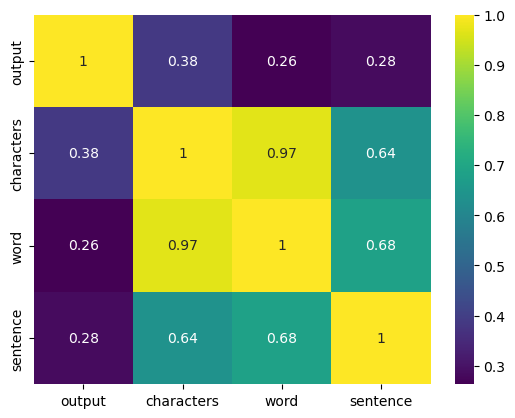

In [47]:
sns.heatmap(df.corr(),annot=True,cmap="viridis")

# Observations

In [48]:
import string

**The string module in Python is a built-in module that provides various string constants and helper functions for working with strings. It can be useful for tasks like string manipulation, text processing, and cleaning.**

In [49]:
# Intilizing Porter Stemmer Class
ps = PorterStemmer()

**It looks like you've created an instance of the Porter Stemmer from the NLTK library in Python. The Porter Stemmer is a popular stemming algorithm used in natural language processing to reduce words to their root or base form. Stemming is a text normalization technique that helps in simplifying words and reducing them to a common form, which can be useful for various text processing tasks.**

In [51]:
# This Function helps to get Ready!!!

def data(text):
    text = text.lower()               #  Converts Text in Lower Case
    text = nltk.word_tokenize(text)   #  Breaks Text in Words 
    
    y = []
    for i in text:
        if i.isalnum():               #  Removing Special Characters
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:                    #  Removing Stopwords and Punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:                    #  Porter Stemmer removing unwanted words
        y.append(ps.stem(i))
        
    return " ".join(y)

In [52]:
data("Hello  how are you?")

'hello'

In [53]:
df.sample(2)

,output,input,characters,word,sentence
66,0,"Today is \song dedicated day..\"" Which song wi...",124,29,2
2166,0,"Thank you. And by the way, I just lost.",39,12,2


In [54]:
# Transforming dataset using the "data" function in new column "new_data"
df["new_data"] = df["input"].apply(data)

In [55]:
df.sample(5)

,output,input,characters,word,sentence,new_data
2816,1,Gr8 Poly tones 4 ALL mobs direct 2u rply with ...,160,30,1,gr8 poli tone 4 mob direct 2u rpli poli titl 8...
4033,0,Wot u up 2? Thout u were gonna call me!! Txt b...,54,18,3,wot u 2 thout u gon na call txt bak luv k
3104,0,Or remind me in a few hrs.,26,8,1,remind hr
5356,0,Tell me something. Thats okay.,30,7,2,tell someth that okay
698,0,Mum ask Ì_ to buy food home...,30,8,1,mum ask buy food home


In [56]:
 pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


# Word Cloud

In [57]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

**matplotlib.pyplot: This is a widely-used library for creating various types of plots and visualizations in Python. It provides a versatile set of functions and features for creating charts, graphs, and other data visualizations.**


**WordCloud: This class is part of the wordcloud library, which is specifically designed for creating word clouds. A word cloud is a visual representation of text data where the size of each word in the cloud is proportional to its frequency or importance in the text.**


In [65]:
wc = WordCloud(
    background_color='white',
    width=800,
    height=400
)

In [66]:
# Wordcloud for SPAM
spam_wc = wc.generate(df[df["output"] == 1]["new_data"].str.cat(sep=" "))

# Wordcloud for HAM
ham_wc = wc.generate(df[df["output"] == 0]["new_data"].str.cat(sep=" "))


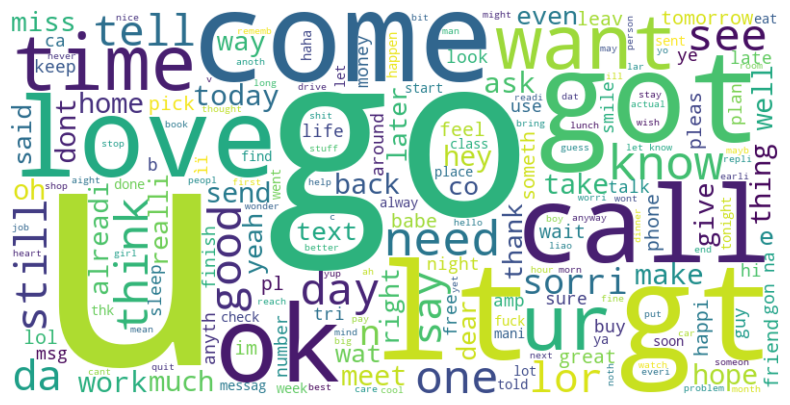

In [67]:
# SPAM 
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

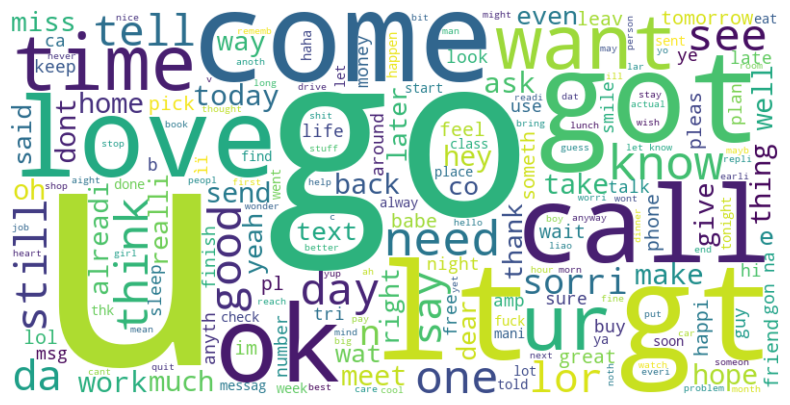

In [68]:
# HAM
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Bar Plot

In [69]:
# Spliting SPAM Sentences in Words
spam_corpus = []
for msg in df[df["output"]==1]["new_data"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [70]:
print(spam_corpus)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

In [71]:
from collections import Counter

**It appears that you have imported the Counter class from the collections module in Python. The Counter class is a powerful tool for counting the occurrences of elements in an iterable, such as a list or string. It allows you to efficiently count and keep track of the frequency of elements.**

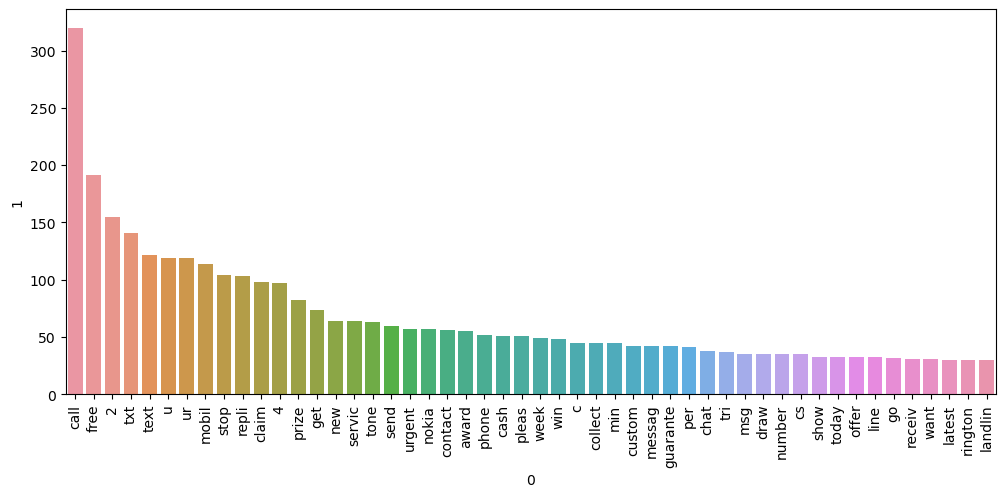

In [72]:
# Top 50 SPAM Words
a=pd.DataFrame(Counter(spam_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(spam_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)
plt.show()

In [76]:
#Spliting HAM Sentences in Words
ham_corpus = []
for msg in df[df['output'] == 0]['new_data'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

# Top 50 HAM Words
a=pd.DataFrame(Counter(ham_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(ham_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)

plt.show()

# Vectorization

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split



**TfidfVectorizer: This module is used for converting a collection of raw documents (text) into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features. TF-IDF is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents (corpus). It's a common technique for text data preprocessing and feature extraction.**
    
 **train_test_split: This module is used for splitting your dataset into training and testing sets. It's a crucial step in machine learning, as it allows you to train your model on one subset of data (training set) and evaluate its performance on another subset (testing set) to assess its generalization capabilities**

In [79]:
# Initilizing TFIDF Vectorizer
tfidv = TfidfVectorizer(max_features=3000)

In [80]:
# Independent Feature
X = tfidv.fit_transform(df["new_data"]).toarray()

In [81]:
# Dependent Feature
y = df["output"].values

In [82]:
# Performing Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Models Training

In [83]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [84]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import accuracy_score, precision_score
import pandas as pd


1. Gaussian Naive Bayes (GaussianNB): A classifier based on the Gaussian Naive Bayes algorithm, suitable for classification tasks.

2. Multinomial Naive Bayes (MultinomialNB): A classifier based on the Multinomial Naive Bayes algorithm, often used for text classification tasks.

3. Bernoulli Naive Bayes (BernoulliNB): A classifier based on the Bernoulli Naive Bayes algorithm, suitable for binary classification tasks.

4. Logistic Regression (LogisticRegression): A classifier based on the logistic regression algorithm, commonly used for binary and multiclass classification.

5. Support Vector Classifier (SVC): A classifier based on Support Vector Machines, suitable for various classification tasks.

6. Decision Tree Classifier (DecisionTreeClassifier): A classifier based on decision trees, useful for both classification and regression tasks.

7. k-Nearest Neighbors (KNeighborsClassifier): A classifier based on the k-nearest neighbors algorithm, which is used for classification tasks.

8. Bagging Classifier (BaggingClassifier): A classifier that uses ensemble techniques like bagging with a base classifier.

9. Random Forest Classifier (RandomForestClassifier): A classifier based on the random forest ensemble method, known for its robustness and performance.

In [86]:
# Models that are going to be trained
models={
    "Gaussian NB" : GaussianNB(),
    "Multinomial NB" : MultinomialNB(),
    "Bernoulli NB" : BernoulliNB(),
    "Logistic Regression" : LogisticRegression(),
    "SVC" : SVC(),
    "Decision Tree" : DecisionTreeClassifier(),
    "KNN" : KNeighborsClassifier(),
    "Bagging CLF" : BaggingClassifier(),
    "Random Forest" : RandomForestClassifier(),
}

#"ETC" : ExtraTreesClassifier(),
#"Ada Boost" : AdaBoostClassifier(),
#   "Gradient Boost" : GradientBoostingClassifier(),
#  "XGB" : XGBClassifier(),
# "XGBRF" : XGBRFClassifier()

In [87]:
# Creating a function train each model and calculate/return accuracy and precision
def train_clf (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    
    return acc, pre

In [89]:
# A FOR loop Calls "traim_clf" for each model and stores accuracy and precision
acc_s=[]
pre_s=[]

for name, model in models.items():
    accuracy, precision = train_clf(model, X_train, y_train, X_test, y_test)
    
    acc_s.append(accuracy)
    pre_s.append(precision)

In [90]:
# As Precision matter over Accuracy in this Data, Sorting in DESC order of Precision. All Scores of Models

scores_df = pd.DataFrame({"Algorithm": models.keys(), 
                          "Accuracy": acc_s, 
                         "Precision": pre_s}).sort_values(by="Precision", ascending=False)

#  Algorithms: Accuracy and Precision 

In [92]:
scores_df

,Algorithm,Accuracy,Precision
1,Multinomial NB,0.970986,1.000000
6,KNN,0.905222,1.000000
2,Bernoulli NB,0.983559,0.991870
8,Random Forest,0.976789,0.983051
4,SVC,0.972921,0.982456
3,Logistic Regression,0.956480,0.979381
7,Bagging CLF,0.950677,0.832061
5,Decision Tree,0.946809,0.790210
0,Gaussian NB,0.869439,0.506849


# Observations:

 * Multinomial NB has an accuracy of 97.29% and a precision of 100.00%.
 * KNN (K-Nearest Neighbors) has an accuracy of 90.52% and a precision of 100.00%.
 * Bernoulli NB has an accuracy of 98.16% and a precision of 99.17%.
 * Random Forest has an accuracy of 97.49% and a precision of 98.28%.
 * SVC (Support Vector Classifier) has an accuracy of 97.10% and a precision of 97.37%.
 * Logistic Regression has an accuracy of 95.16% and a precision of 96.81%.
 * Bagging CLF (Classifier) has an accuracy of 95.36% and a precision of 87.50%.
 * XGBRF (XGBoost Random Forest) has an accuracy of 94.00% and a precision of 87.25%.
 * Decision Tree has an accuracy of 94.39% and a precision of 80.77%.
 * Gaussian NB (Naive Bayes) has an accuracy of 86.75% and a precision of 50.22%.


# Scores Bar Plot

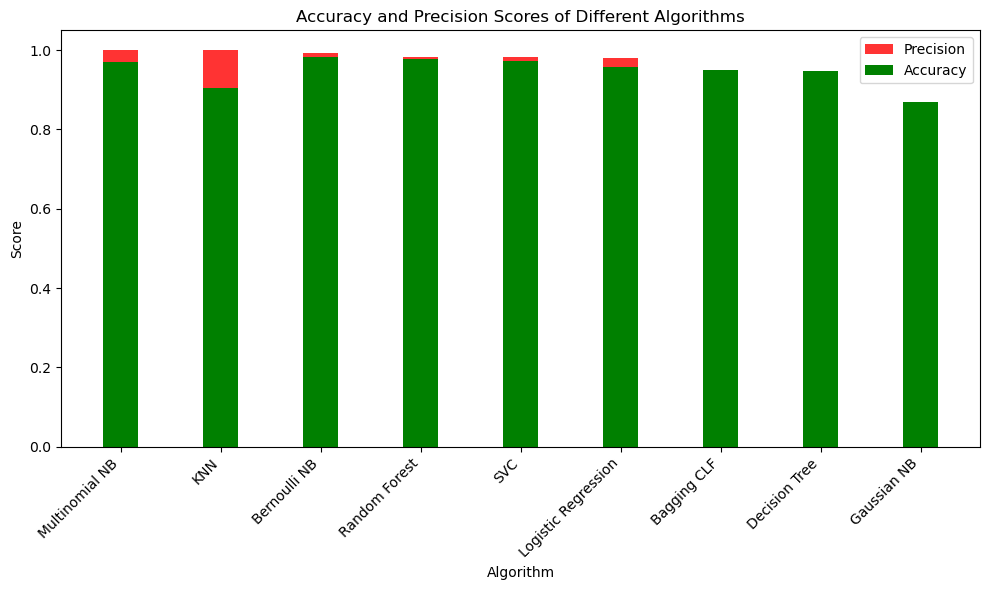

In [93]:
# Graph Accuracy and Precision

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(scores_df["Algorithm"], scores_df["Precision"], width=bar_width, label="Precision", color='red', alpha=0.8)
plt.bar(scores_df["Algorithm"], scores_df["Accuracy"], width=bar_width, label="Accuracy", color='green')
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.title("Accuracy and Precision Scores of Different Algorithms")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Observations:
* Models with high precision scores, such as Multinomial NB (100.00%), KNN (100.00%), and Bernoulli NB (99.17%), have a high ability to correctly identify positive instances.
 * Models with high accuracy scores, such as Bernoulli NB (98.16%) and Random Forest (97.49%), make accurate overall predictions on the dataset.

In [94]:
# Hence Multinomial Naïve Bayes give excellent precision and accuracy scores.
# According to me MNB is sutaible for Model

mnb=MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()